Problem 5: Passengers of the Titanic | Decision Tree

a) Load the Titanic dataset into a Pandas dataframe. What preprocessing steps do you think is needed for this data? Apply them to the data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# Load Titanic dataset into a Pandas dataframe
df = pd.read_csv('Titanic-Dataset.csv')

# convert all column names to strings
df.columns = df.columns.astype(str)

# Drop unnecessary columns
df.drop(["Cabin", "Ticket"], axis=1, inplace=True)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# Perform one-hot encoding on the 'Sex' , 'Embarked' column
df = pd.get_dummies(df, columns=['Sex'])
df = pd.get_dummies(df, columns=['Embarked'])
# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 1
df['IsAlone'].loc[df['FamilySize'] > 1] = 0



print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
0   7.2500           0         1           0           0           1   
1  71.2833           1         0           1           0           0   
2   7.9250           1         0           0           0           1   
3  53.1000           1         0      

<ipython-input-40-ed1eec088b9e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0


b) Split the dataset into training and testing sets using a 80/20 split ratio.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif


# Split the data into input and output variables
X = df.drop(["PassengerId", "Survived", "Name"], axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns = X_train.columns.astype(str)

# Apply SelectKBest for feature selection
selector = SelectKBest(f_classif, k=5)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)



c) Perform hyperparameter tuning to optimize the performance of the decision tree model. what hyperparameters would you tune?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Perform grid search to find the best hyperparameters 
param_grid = {
    "max_features": ["auto", "sqrt", "log2"],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5 , error_score='raise')
grid_search.fit(X_train, y_train )

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)


Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy score: 0.8075248694967005


d)With parameters you got in previous part train a decision tree and report the accuracy, precision, recall and F1score on test dataset.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_features = 'auto', max_depth=10,min_samples_split  = 10 , min_samples_leaf = 1)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Compute evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Accuracy: 0.799
Precision: 0.788
Recall: 0.703
F1-Score: 0.743


e) Visualize the decision tree using Graphviz or Matplotlib. what insights can you gain from the visualization?

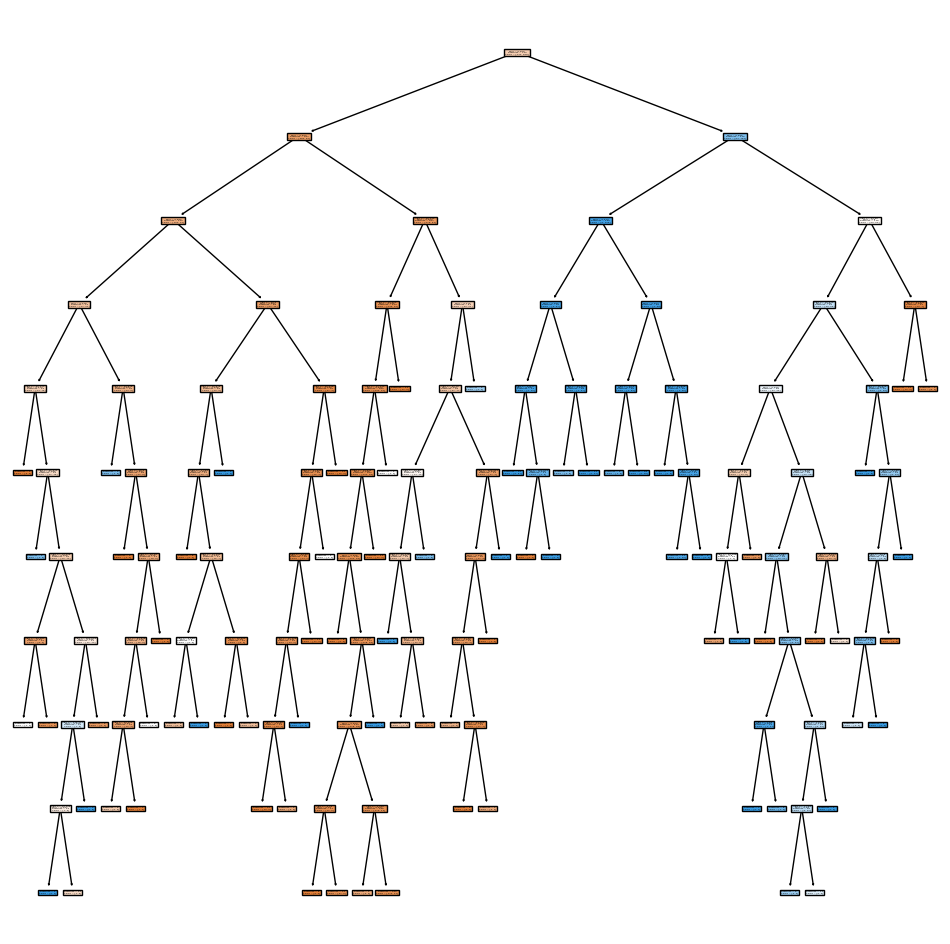

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dt_classifier, feature_names=X.columns, filled=True, ax=ax)
plt.show()

f) Perform pruning on the decision tree model to prevent overfitting.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Train an unpruned decision tree
dt_unpruned = DecisionTreeClassifier(max_features = 'auto', max_depth=10,min_samples_split  = 10 , min_samples_leaf = 1)
dt_unpruned.fit(X_train, y_train)

# Make predictions on test data
y_pred_unpruned = dt_unpruned.predict(X_test)


# Prune the decision tree
path = dt_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

dt_pruned = DecisionTreeClassifier(max_features = 'auto', max_depth=10,min_samples_split  = 10 , min_samples_leaf = 1)
ccp_pruning = []


for ccp_alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    dt_pruned.fit(X_train, y_train)
    y_pred_pruned = dt_pruned.predict(X_test)
    ccp_pruning.append([
        ccp_alpha,
        accuracy_score(y_test, y_pred_pruned),
        precision_score(y_test, y_pred_pruned),
        recall_score(y_test, y_pred_pruned),
        f1_score(y_test, y_pred_pruned)
    ])


ccp_pruning = pd.DataFrame(ccp_pruning, columns=["ccp_alpha", "accuracy", "precision", "recall", "f1_score"])

# Find the optimal ccp_alpha value that results in highest accuracy
optimal_ccp_alpha = ccp_pruning[ccp_pruning['accuracy'] == ccp_pruning['accuracy'].max()]['ccp_alpha'].values[0]
# Train a decision tree with the optimal ccp_alpha value
dt_pruned = DecisionTreeClassifier(max_features = 'auto', max_depth=10,min_samples_split  = 10 , min_samples_leaf = 1, ccp_alpha=optimal_ccp_alpha, random_state=42)
dt_pruned.fit(X_train, y_train)

# Make predictions on test data
y_pred_pruned = dt_pruned.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g) compare the performance of the pruned decision tree model to the unpruned model, and what insights can you gain from the comparison?

In [ ]:

# Calculate evaluation metrics for unpruned model
print("Unpruned Decision Tree Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_unpruned))
print("Precision:", precision_score(y_test, y_pred_unpruned))
print("Recall:", recall_score(y_test, y_pred_unpruned))
print("F1 Score:", f1_score(y_test, y_pred_unpruned))



# Calculate evaluation metrics for pruned model
print("\nPruned Decision Tree Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("Precision:", precision_score(y_test, y_pred_pruned))
print("Recall:", recall_score(y_test, y_pred_pruned))
print("F1 Score:", f1_score(y_test, y_pred_pruned))


Unpruned Decision Tree Performance:

Accuracy: 0.7932960893854749
Precision: 0.8032786885245902
Recall: 0.6621621621621622
F1 Score: 0.725925925925926

Pruned Decision Tree Performance:

Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
